In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from ambiance import Atmosphere

In [42]:
# weigths for boeing 737
W0=580506.8               # gross weigth in newtons
empty_weigth= 291415.9            
fuel_weigth=119005.1
payload=170085.6
maximum_landing_weigth=493403.8
W1=W0-fuel_weigth
s=111.63
K=0.04244
ct=0.6 #thrust specific fuel consumption in hr^-1
CD0=0.0159
view=100

In [14]:
def f(CL):
    return CD0+(K*CL**2)
def ff(rho):
    return ((((3*K)/(CD0))**(0.5))*(W0/s)*(2/rho))**(0.5) #for range
def fff(rho):
    return ((((K)/(CD0))**(0.5))*(W0/s)*(2/rho))**(0.5) #  for endurance


In [19]:
# for range 
#cd0=3kcl^2  
# cl^(1/2)/cd  maximum range condition
CL1=(CD0/(3*K))**(0.5)
E1=(CL1**(0.5))/(f(CL1))   #where E1 is the cl^(1/2)/cd ratio


# for endurance
#CD0=KCL^2
# CL/CD max condition for maximum endurance
CL2=(CD0/(K))**(0.5)
E2=(CL2)/(f(CL2))     # where E2 CL/CD max condition for maximum endurance



In [39]:
alt=[0,1,2,3,4,5,6,7,8,9,10]
rho=np.zeros(len(alt))
R=np.zeros(len(alt))
VR=np.zeros(len(alt)) # at this velocity range is maximum
EN=np.zeros(len(alt))
VE=np.zeros(len(alt)) # at this velocity range is endurance
for i in range(len(alt)):
    mosphere = Atmosphere(alt[i]*1000)
    #density at various altitudes calculations
    rho[i] = mosphere.density
    
    #calculation of range
    a1=(W0**(0.5)-W1**(0.5))*E1*((2*3600)/ct)*((2/(rho[i]*s))**(0.5))
    R[i]=a1/1000  #for KM convertion
    VR[i]=ff(rho[i])
    
    
    #calculation of endurance
    a2=(1/ct)*(E2)*(math.log(W0/W1))
    EN[i]=a2
    VE[i]=fff(rho[i])
    

In [40]:
dfa=pd.DataFrame({ 'Altitude':alt,'Density':rho,'Max range(km)':R,'V for Rmax':VR,'Emax(hrs)':EN,'V for Emax':VE})
DFA=dfa.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'green'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid green')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'honeydew')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFA)

Altitude,Density,Max range(km),V for Rmax,Emax(hrs),V for Emax
0,1.225000,3360.110125,155.001186,7.359627,117.775432
1,1.111660,3527.245053,162.711085,7.359627,123.633689
2,1.006554,3706.833442,170.995461,7.359627,129.928453
3,0.909254,3900.128051,179.912101,7.359627,136.703635
4,0.819347,4108.542002,189.526193,7.359627,144.008765
5,0.736429,4333.673932,199.911483,7.359627,151.899879
6,0.660111,4577.337849,211.151649,7.359627,160.440558
7,0.590018,4841.598731,223.341949,7.359627,169.703183
8,0.525786,5128.815153,236.591183,7.359627,179.770424
9,0.467063,5441.690578,251.024062,7.359627,190.737040


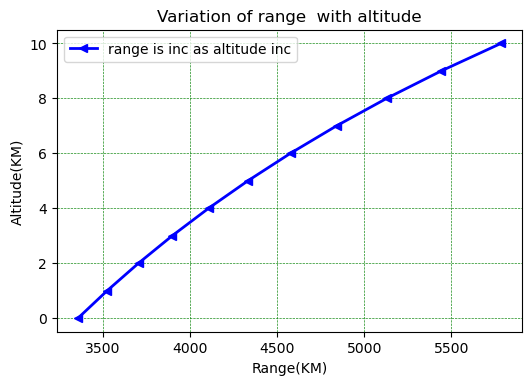

In [56]:
plt.figure(num=2,dpi=view)
plt.plot(R,alt,linewidth=2,label='range is inc as altitude inc',color='blue',marker='<')
plt.title("Variation of range  with altitude")
plt.xlabel('Range(KM)')
plt.ylabel('Altitude(KM)')
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.45)

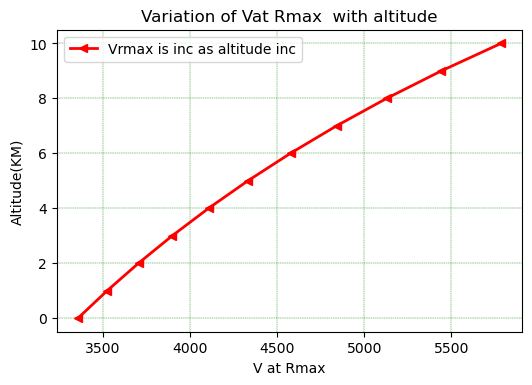

In [58]:
plt.figure(num=2,dpi=view)
plt.plot(R,alt,linewidth=2,label='Vrmax is inc as altitude inc',color='red',marker='<')
plt.title("Variation of Vat Rmax  with altitude")
plt.xlabel('V at Rmax')
plt.ylabel('Altitude(KM)')
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

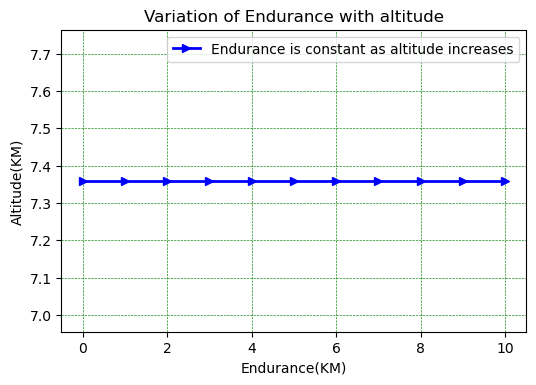

In [63]:
plt.figure(num=2,dpi=view)
plt.plot(alt,EN,linewidth=2,label='Endurance is constant as altitude increases',color='blue',marker='>')
plt.title("Variation of Endurance with altitude")
plt.xlabel('Endurance(KM)')
plt.ylabel('Altitude(KM)')
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.45)

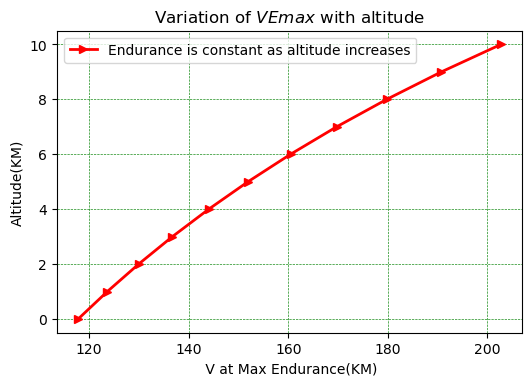

In [65]:
plt.figure(num=2,dpi=view)
plt.plot(VE,alt,linewidth=2,label='Endurance is constant as altitude increases',color='red',marker='>')
plt.title("Variation of $VEmax$ with altitude")
plt.xlabel(' V at Max Endurance(KM)')
plt.ylabel('Altitude(KM)')
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.45)